In [71]:
import os
DATA_DIR = r"Datasets/Raw/TumorData"

In [72]:
files = os.listdir(DATA_DIR)
filepaths = [os.path.join(DATA_DIR, f) for f in files if f.endswith('.mat')]
filepaths[:10]

['Datasets/Raw/TumorData\\1.mat',
 'Datasets/Raw/TumorData\\10.mat',
 'Datasets/Raw/TumorData\\100.mat',
 'Datasets/Raw/TumorData\\1000.mat',
 'Datasets/Raw/TumorData\\1001.mat',
 'Datasets/Raw/TumorData\\1002.mat',
 'Datasets/Raw/TumorData\\1003.mat',
 'Datasets/Raw/TumorData\\1004.mat',
 'Datasets/Raw/TumorData\\1005.mat',
 'Datasets/Raw/TumorData\\1006.mat']

In [73]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# check labels
labels = []
for testpath in filepaths:
    data = h5py.File(testpath, 'r')
    cjdata = data['cjdata']
    # Extract the actual label value from the HDF5 dataset
    label_value = np.array(cjdata['label'])[0, 0]  # Extract the scalar value from (1,1) array
    print(f"File: {os.path.basename(testpath)}, Label: {label_value}")
    data.close()

    labels.append(label_value)  

File: 1.mat, Label: 1.0
File: 10.mat, Label: 1.0
File: 100.mat, Label: 1.0
File: 1000.mat, Label: 3.0
File: 1001.mat, Label: 3.0
File: 1002.mat, Label: 3.0
File: 1003.mat, Label: 3.0
File: 1004.mat, Label: 3.0
File: 1005.mat, Label: 3.0
File: 1006.mat, Label: 3.0
File: 1007.mat, Label: 3.0
File: 1008.mat, Label: 3.0
File: 1009.mat, Label: 3.0
File: 101.mat, Label: 1.0
File: 1010.mat, Label: 3.0
File: 1011.mat, Label: 3.0
File: 1012.mat, Label: 3.0
File: 1013.mat, Label: 3.0
File: 1014.mat, Label: 3.0
File: 1015.mat, Label: 3.0
File: 1016.mat, Label: 3.0
File: 1017.mat, Label: 3.0
File: 1018.mat, Label: 3.0
File: 1019.mat, Label: 3.0
File: 102.mat, Label: 1.0
File: 1020.mat, Label: 3.0
File: 1021.mat, Label: 3.0
File: 1022.mat, Label: 3.0
File: 1023.mat, Label: 3.0
File: 1024.mat, Label: 3.0
File: 1025.mat, Label: 3.0
File: 1026.mat, Label: 3.0
File: 1027.mat, Label: 3.0
File: 1028.mat, Label: 3.0
File: 1029.mat, Label: 3.0
File: 103.mat, Label: 1.0
File: 1030.mat, Label: 3.0
File: 1031

In [75]:
from collections import Counter

# Using your labels list
label_counts = Counter(labels)
print("Label frequencies:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} times")

Label frequencies:
Label 1.0: 708 times
Label 3.0: 930 times
Label 2.0: 1426 times


In [76]:
data = h5py.File(filepaths[1], 'r')
cjdata = data['cjdata']
cjdata

<HDF5 group "/cjdata" (5 members)>

In [77]:
print("Keys in cjdata:", list(cjdata.keys()))
cjdata['image']

Keys in cjdata: ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


<HDF5 dataset "image": shape (512, 512), type "<i2">

In [78]:
cjdata['label'][0]

array([1.])

In [79]:
np.array(cjdata['PID'])

array([[49],
       [48],
       [49],
       [48],
       [49],
       [54]], dtype=uint16)

In [80]:
np.array(cjdata['label'])

array([[1.]])

In [81]:
tumorBorder = np.array(cjdata['tumorBorder'])
tumorBorder

array([[248.8641115 , 256.89198606, 238.16027875, 270.271777  ,
        237.26829268, 282.75958188, 236.37630662, 297.92334495,
        241.728223  , 310.41114983, 253.32404181, 321.11498258,
        270.271777  , 325.57491289, 286.32752613, 321.11498258,
        297.03135889, 308.6271777 , 300.59930314, 285.43554007,
        296.13937282, 267.59581882, 282.75958188, 256.89198606,
        258.67595819, 251.54006969]])

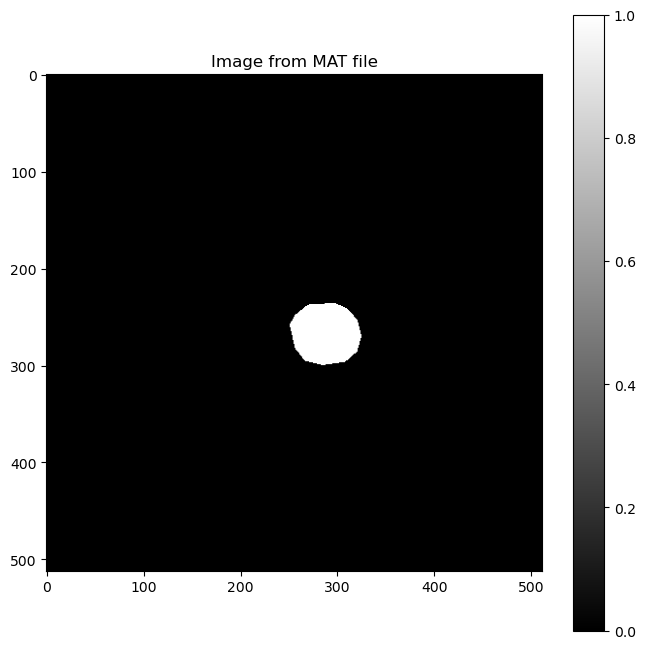

In [82]:
plt.figure(figsize=(8, 8))
plt.imshow(cjdata['tumorMask'], cmap='gray')
plt.colorbar()
plt.title("Image from MAT file")
plt.show()

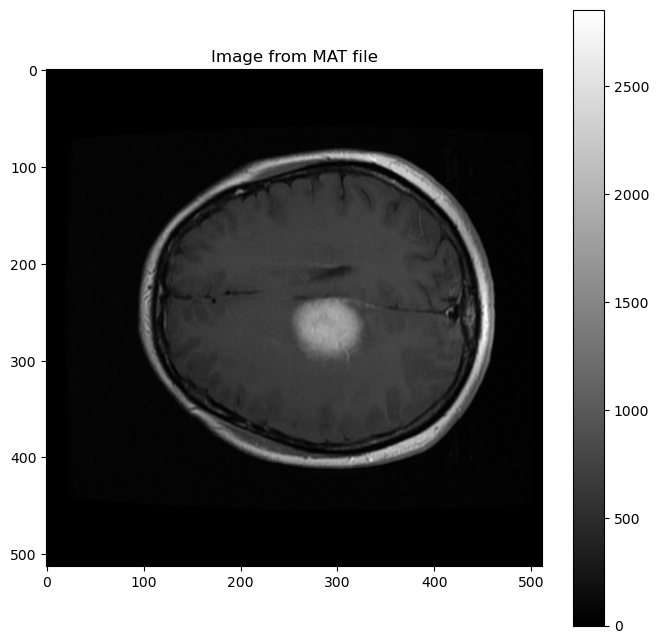

In [83]:
plt.figure(figsize=(8, 8))
plt.imshow(cjdata['image'], cmap='gray')
plt.colorbar()
plt.title("Image from MAT file")
plt.show()


In [84]:
# tumor_border

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import h5py
from pathlib import Path

IMG_ID = 450
file_path = filepaths[IMG_ID]

with h5py.File(file_path, 'r') as f:
    cj = f['cjdata']
    image = np.array(cj['image'], dtype=np.float32)
    H, W = image.shape

    # --- mask (ensure orientation) ---
    tumor_mask = np.array(cj['tumorMask']).astype(np.uint8)
    if tumor_mask.max() > 1:
        tumor_mask = (tumor_mask > 0).astype(np.uint8)
    if tumor_mask.shape != image.shape:
        tumor_mask = tumor_mask.T

    # --- polygon (no flipping; convert 1-based -> 0-based) ---
    tb = np.array(cj['tumorBorder'])
    if tb.ndim == 1 or (tb.ndim == 2 and min(tb.shape) == 1):
        v = tb.ravel()
        x = v[::2] - 1
        y = v[1::2] - 1
    elif tb.shape[0] == 2:
        x = tb[0, :] - 1
        y = tb[1, :] - 1
    else:  # (N,2)
        x = tb[:, 0] - 1
        y = tb[:, 1] - 1
    x = np.clip(x, 0, W - 1);  y = np.clip(y, 0, H - 1)
    x_closed = np.r_[x, x[0]]; y_closed = np.r_[y, y[0]]

    # --- bboxes ---
    gt_xmin, gt_xmax = int(np.floor(x.min())), int(np.ceil(x.max()))
    gt_ymin, gt_ymax = int(np.floor(y.min())), int(np.ceil(y.max()))
    gt_w = max(1, gt_xmax - gt_xmin + 1); gt_h = max(1, gt_ymax - gt_ymin + 1)

    ys, xs = np.where(tumor_mask > 0)
    if xs.size:
        m_xmin, m_xmax = xs.min(), xs.max()
        m_ymin, m_ymax = ys.min(), ys.max()
        m_w = max(1, m_xmax - m_xmin + 1); m_h = max(1, m_ymax - m_ymin + 1)
    else:
        m_xmin = m_ymin = m_w = m_h = None

# overlay colour only where tumour==1
rgba = np.zeros((H, W, 4), dtype=np.float32)
rgba[tumor_mask > 0] = (1.0, 0.0, 0.0, 0.35)  # red with transparency

# ---- helpers to save each panel as its own file ----

out_dir = Path(f"tumour_outputs/{IMG_ID}"); out_dir.mkdir(parents=True, exist_ok=True)
dpi = 300  # controls pixel size; change if you want exact pixels

def new_fig_ax():
    fig, ax = plt.subplots(figsize=(W/dpi, H/dpi), dpi=dpi)
    ax.imshow(image, cmap='gray'); ax.axis('off')
    return fig, ax

def save(fig, path):
    fig.savefig(path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# 1) Original
fig, ax = new_fig_ax()
save(fig, out_dir / "01_original.png")

# 2) Tumour-only colour + both bboxes
fig, ax = new_fig_ax()
ax.imshow(rgba)
# ax.add_patch(patches.Rectangle((gt_xmin, gt_ymin), gt_w, gt_h,
#                                linewidth=2, edgecolor='yellow', facecolor='none'))
# if m_w is not None:
#     ax.add_patch(patches.Rectangle((m_xmin, m_ymin), m_w, m_h,
#                                    linewidth=2, edgecolor='lime', facecolor='none'))
save(fig, out_dir / "02_mask_and_bboxes.png")

# 3) Tumour border + both bboxes
fig, ax = new_fig_ax()
ax.plot(x_closed, y_closed, 'r-', linewidth=3)
# ax.add_patch(patches.Rectangle((gt_xmin, gt_ymin), gt_w, gt_h,
#                                linewidth=2, edgecolor='yellow', facecolor='none'))
# if m_w is not None:
#     ax.add_patch(patches.Rectangle((m_xmin, m_ymin), m_w, m_h,
#                                    linewidth=2, edgecolor='lime', facecolor='none'))
save(fig, out_dir / "03_border_and_bboxes.png")

print(f"Saved individual images to: {out_dir.resolve()}")


Saved individual images to: C:\Users\PK\Desktop\MSC\Sem2\CS5802 - Advanced ML\BrainTumor\tumour_outputs\450
